Efectos de la atmósfera terrestre sobre la radiación que llega del espacio
===

Autores
---
J.P. Calderón & R. Gamen

Resumen
---
Cuando observamos una fuente astronómica con un telescopio en la Tierra, la atmósfera afecta la radiación que recibimos. Existen maneras de caracterizar este efecto. En esta práctica aprenderemos uno de ellos.

Recuerden leer la bibliografía accesible desde la Wiki de la materia [Wiki:Unidad 3](http://astronomiaestelarlp.pbworks.com/w/page/106869798/Programa%20de%20la%20materia).

Objetivos
---
* Obtener la fotometría de apertura de una series de imagenes obtenidas en el Complejo Astronómico El Leoncito, San Juan, en noviembre de 2015. 
* Determinar la pendiente de la ecuación de la Ley de Bouguer para cada uno de los filtros disponibles.

Los pasos que vamos a seguir son:

1. **Introducción**
    1. [Inspección visual de las imagenes](#inspeccion)
    2. [Identificación de las estrellas a medir](#identificacion)
    3. [Grafico de la curva de crecimiento](#curva_de_crecimiento)
    
2. **Fotometría de apertura**
    1. [Usando ```phot utils``` ](#como_funciona)
    2. [¡A medir!](#a_medir)
    3. [Ajuste del modelo lineal](#ley_de_bouguer)

Referencias
---
* [Baume, G., Coronel, C., De Bórtoli, B., et al. (2017)](http://adsabs.harvard.edu/abs/2017BAAA...59...46B)
* [Landolt, A. U.: (1992)](http://adsabs.harvard.edu/abs/1992AJ....104..340L)
* [Listado de estrellas estandard (ESO)](https://www.eso.org/sci/observing/tools/standards.html)

* [Práctica 03 (overleaf)](https://www.overleaf.com/read/npkyvfvnssds)

---

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

[Tania] <br> 
_matplotlib.pyplot_: is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting. Pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.

The _astropy.io.fits_ package provides access to FITS files. FITS (Flexible Image Transport System) is a portable file standard widely used in the astronomy community to store images and tables.



[//]: # "Your comment in here."


In [2]:
!ls   

Curva de crecimiento.ipynb  tphe.jpg	    tphe_i03s.fits  tphe_u03s.fits
Preguntas.ipynb		    tphe_b01s.fits  tphe_r01s.fits  tphe_v01s.fits
list ABCD		    tphe_b02s.fits  tphe_r02s.fits  tphe_v02s.fits
list ABCD.odt		    tphe_b03s.fits  tphe_r03s.fits  tphe_v03s.fits
practica03.ipynb	    tphe_i01s.fits  tphe_u01s.fits
practica03.zip		    tphe_i02s.fits  tphe_u02s.fits


<a id='inspeccion'></a>
## A. Despliegue una de las imágenes en el DS9. Identifique las estrellas estándares del campo de T Phoenicis (TPHE). Comparando con las indicadas en el trabajo de Landolt (1992).

In [3]:
imagen = 'tphe_v01s.fits'
with fits.open(imagen) as hdul:
    hdul.info()
    hdr = hdul[0].header  # defino hdr como la variable con el contenido del header
    data = hdul[0].data   # defino data con el contenido de la imagen
    
#anulamos la identacion con el tabulado

Filename: tphe_v01s.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (409, 411)   float32   


In [4]:
hdr  # para "ver" una variable simplemente tipeo su nombre

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  409 / Axis length                                    
NAXIS2  =                  411 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2016-08-30T14:18:20' / Date FITS file was generated                  
IRAF-TLM= '2017-03-08T19:38:43' / Time of last modification                     
OBJECT  = 'TPHE    '           / Name of the object observed                    
CCDSIZE = '[1:2048,1:2058] '     / CCD size                                     
CCDSUM  = '5 5 '                 / CCD binning factors                          
PIXSIZE1=                 13

In [5]:
time = hdr['EXPTIME'] #nombre del keyword
# EXPTIME: exposure time - seconds
time

30.0

In [6]:
type(hdr)

astropy.io.fits.header.Header

In [7]:
# Determino variables estadísticas de la imagen

data_min = data.min()
data_max = data.max()
data_mean = data.mean()
data_std = data.std()

print ( data_min, data_max, data_mean, data_std )

0.0 55449.273 136.52036 384.5497


[Tania] <br>

data = hdul[0].data   # defino data con el contenido de la imagen

data_min = data.min()

data_... = data.function()

¿cómo funciona esto?

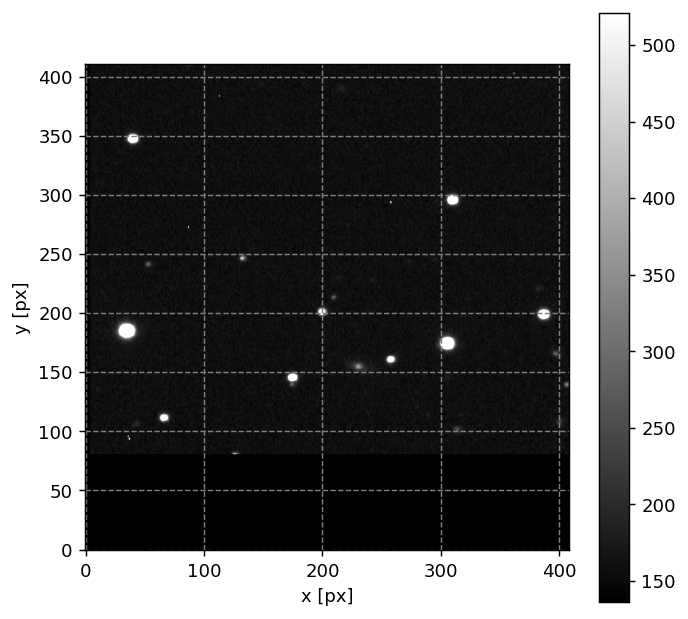

In [8]:
# Le indico entre qué valores z1 (=vmin) y z2 (=vmax) quiero "ver", 
# y despliego la imagen dentro de notebook

fig, ax = plt.subplots ( ncols = 1, nrows = 1, figsize = (6, 6), dpi = 130 )

im = ax.imshow ( data, origin = 'lower',  vmin = data_mean - 0*data_std, 
                vmax = data_mean + 1*data_std, cmap = 'gray')
#im = ax.imshow ( data, origin = 'lower',  vmin = data_mean, 
#                vmax = data_mean + 1*data_std, cmap = 'gray') 
#esto eslo mismo


#imshow
#origin='lower'

fig.colorbar(im)

ax.set_xlabel ( 'x [px]' )
ax.set_ylabel ( 'y [px]' )
plt.grid ( color = 'gray', linestyle = 'dashed' )

plt.show()

In [19]:
# !conda install imexam -c http://ssb.stsci.edu/astroconda NO FUNCIONÓ

# !pip install imexam FALLÓ

# !pip install git+https://github.com/spacetelescope/imexam.git@v0.6.3#egg=imexam

# FALLARON TODOS LOS INTENTOS  
    

  Cloning https://github.com/spacetelescope/imexam.git (to revision v0.6.3) to /tmp/pip-install-4yx4cmx_/imexam
  ERROR: Error [Errno 2] No such file or directory: 'git' while executing command git clone -q https://github.com/spacetelescope/imexam.git /tmp/pip-install-4yx4cmx_/imexam
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [18]:
# Abrir el ds9, desde la terminal de CONDA.
# ejemplo: $ ds9 -title "practica00" &
import imexam
import os
os.environ['$XPA_METHOD'] = "local" # para conectarlo a ds9
windows = imexam.list_active_ds9()

if windows:
    a = imexam.connect(windows.popitem()[0])
else:
    print ( 'No encuentro el DS9 abierto.' )

ModuleNotFoundError: No module named 'imexam'

In [23]:
a.load_fits ( 'tphe_v01s.fits' )
a.scale()

NameError: name 'a' is not defined

<a id='identificacion'></a>
## B. Hay que identificar las estrellas que queremos medir.

![](./tphe.jpg)

In [20]:
# Completar con las coordenadas (x, y) de cada estrella en orden: A, B, C, D

# ACÁ ES DONDE IDENTIFICAMOS LAS ESTRELLAS VISUALMENTE CON DS9 (DEEP SPACE NINE)

#positions = [ (x,y), # COMPLETAR
#              (x,y),
#              (x,y),
#              (x,y)
#            ]
positions = [ (310.98451,296.91981), 
              (35.861097,185.77768),
              (388.09531,199.92277),
              (306.76019,175.16892)
            ]

# A continuación, las coordenadas que obtuve yo:
# circle(310.72149,296.61986,17.756704) # text={A}
# circle(35.985782,185.44427,13.29869) # text={B}
# circle(387.9759,199.70158,13.111811) # text={C}
# circle(306.16292,175.05537,12.566225) # text={D}


positions[0]

(310.98451, 296.91981)

In [21]:
for i in zip(*positions):
    print (i)

(310.98451, 35.861097, 388.09531, 306.76019)
(296.91981, 185.77768, 199.92277, 175.16892)


[Tania]  zip(*positions) ¿Qué hace esto?



In [22]:
list(zip(*positions))

[(310.98451, 35.861097, 388.09531, 306.76019),
 (296.91981, 185.77768, 199.92277, 175.16892)]

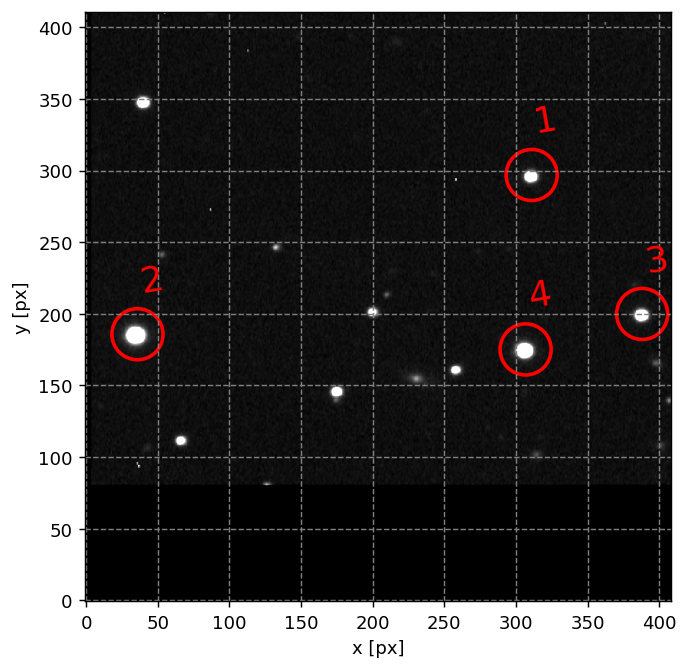

In [27]:
fig, ax = plt.subplots ( ncols = 1, nrows = 1, figsize = (6, 6), dpi = 130 )

ax.imshow ( data, origin = 'lower',  vmin = data_mean - 0*data_std, 
                vmax = data_mean + 1*data_std, cmap = 'gray' )

# Grafico los circulos usando las coordenadas de la _lista_ positions
# La función _zip_ toma los valores (x,y) de la lista y lo pasa como un único valor
ax.scatter ( *list(zip(*positions)), s = 800, linewidths = 2 , facecolors = 'none', edgecolors = 'red' )

# Grafico el _id_ de la estrella: A==1, B==2, C==3, D==4
for i in [ 1, 2, 3, 4 ]:
    ax.annotate(str(i), color = "red", xy = positions[i-1],
                xytext = (0, 30), textcoords = 'offset points', 
                va = "center", rotation = 10, size = 20 )

ax.set_xlabel ( 'x [px]' )
ax.set_ylabel ( 'y [px]' )
plt.grid ( color = 'gray', linestyle = 'dashed' )

plt.show()

<a id='curva_de_crecimiento'></a>
## C. Curva de crecimiento

Ver _notebook_ correspondiente.

<a id='como_funciona'></a>
# Usando ```phot utils``` para medir muchas estrellas (e imágenes) a la vez 
---
## A. ¿Cómo funciona?

Vamos a hacer una prueba con una sola imagen, midiendo las cuatro estrellas identificadas.

In [28]:
!conda install -y -c conda-forge photutils

Solving environment: done

# All requested packages already installed.



 id  xcenter   ycenter    aperture_sum_0     aperture_sum_1 
       pix       pix                                        
--- --------- --------- ------------------ -----------------
  1 310.98451 296.91981 167220.57236676873 78121.57647578219
  2 35.861097 185.77768   879704.450070583 80808.32728841368
  3 388.09531 199.92277 194004.55892211304 78190.39484120077
  4 306.76019 175.16892  480933.5395031167 79041.32397062636


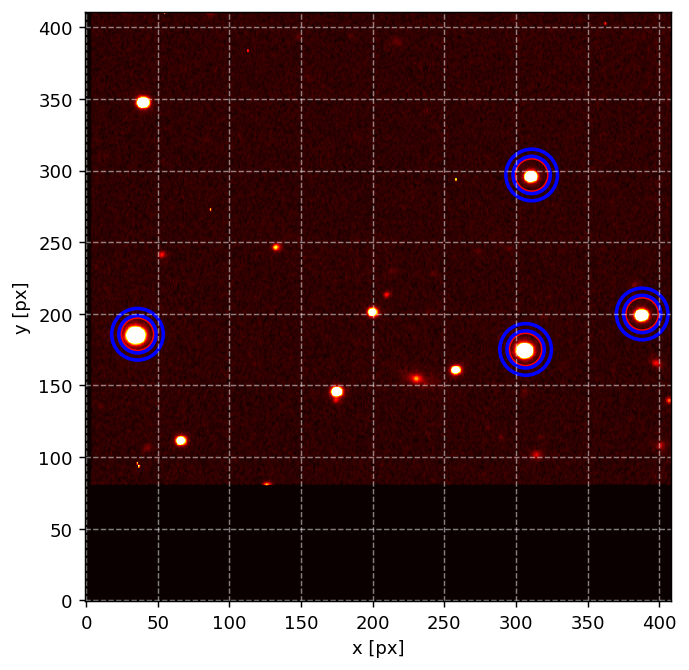

In [29]:
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry
from astropy.io import fits
import pandas as pd
import numpy as np

imagen = 'tphe_v01s.fits'

with fits.open(imagen) as hdul:
    hdr = hdul[0].header  
    data = hdul[0].data  
    
aperture = CircularAperture ( positions, r = 12. )
anncielo = CircularAnnulus ( positions, r_in = 13, r_out = 18 ) 
apers = [ aperture, anncielo ]

phot_table = aperture_photometry ( data, apers )
print(phot_table)

fig, ax = plt.subplots ( ncols = 1, nrows = 1, figsize = (6, 6), dpi = 130 )
ax.imshow ( data, origin = 'lower', vmin = data.mean() - 0*data.std(), 
                 vmax = data.mean() + 1*data.std(), cmap = 'hot' )

ax.set_xlabel ( 'x [px]' )
ax.set_ylabel ( 'y [px]' )

aperture.plot ( color = 'red', linewidth = 2 )
anncielo.plot ( color = 'blue', linewidth = 2 )

plt.grid ( color = 'white', linestyle = '--', alpha = 0.5 )

plt.show()

Si tomamos como $I_{C}$ a la intensidad de la imagen dentro del anillo de cielo, $A_{C}$ como el área de ese anillo. Entonces, $\lt I_{C}\gt$ corresponde a la intensidad media dentro de la apertura considerada:

\begin{equation}
\large \lt I_{C} \gt = I_{C}/A_{C}
\end{equation}

Luego, restamos la intensidad media del cielo a la intensidad de la apertura considerada $I_{A}$, con lo que obtengo la intensidad de las estrella $I_{S}$ sin las contribución del cielo:

\begin{equation}
\large I_{S} = I_{A} - \lt I_{C} \gt
\end{equation}

Por último, paso la intensidad de la estrella a magnitudes:

\begin{equation}
\large m = 25 - 2.5 \ log(I_{S})
\end{equation}

Dónde el termino independiente se utiliza para obtener un valor de la magnitud típico. Esta magnitud corresponde a la instrumental.

In [30]:
bkg_mean = phot_table['aperture_sum_1'] / anncielo.area # ADUs por pixel en el cielo
bkg_sum = bkg_mean * aperture.area                   # ADUs totales del cielo dentro de la apertura de la estrella

phot_table['flux corrected'] = phot_table['aperture_sum_0'] - bkg_sum # ADUs provenientes de la estrella
 
phot_table['magnitud'] = 25.0 - 2.5 * np.log10( phot_table['flux corrected'] / hdr['EXPTIME'] ) 
phot_table['airmass'] = hdr['AIRMASS']

print ( phot_table )

 id  xcenter   ycenter  ...   flux corrected        magnitud      airmass
       pix       pix    ...                                              
--- --------- --------- ... ------------------ ------------------ -------
  1 310.98451 296.91981 ...  94643.10776991301 16.252580655140523    1.04
  2 35.861097 185.77768 ...  804630.9072994116 13.928811360357882    1.04
  3 388.09531 199.92277 ... 121363.15984383618 15.982585948464932    1.04
  4 306.76019 175.16892 ... 407501.59981427673 14.667479841599054    1.04


<a id='a_medir'></a>
## B. ¡a medir!

Ahora que entendemos qué es la fotometría de apertura, podemos continuar midiendo las tres imágenes de cada filtro.

In [35]:
from astropy.io import fits
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry
from astropy.stats import sigma_clipped_stats
import numpy as np
import pandas as pd

fotometria = pd.DataFrame()
table_tmp = pd.DataFrame()

for filter in [ 'v', 'b', 'r' ]: # For sobre los filtros
    for order in [ '01', '02', '03' ]: # For sobre el número de imagen
        
        imagen = 'tphe_'+ filter + order + 's.fits' # 'tphe_v03s.fits'
        print ( "[+] Procesando imagen: " + imagen )
        with fits.open(imagen) as hdul:
            hdr = hdul[0].header  
            data = hdul[0].data   
            
#tenemos 3 instantes de tiempo y 3 filtros. 9 imágenes

#hacemos fotometria....            
            
        aperture = CircularAperture ( positions, r = 16. )
        anncielo = CircularAnnulus ( positions, r_in = 16, r_out = 18 ) # positions, r_in, r_out
        
        apers = [ aperture, anncielo ]
    
        phot_table = aperture_photometry ( data, apers )
  
        bkg_mean = phot_table['aperture_sum_1'] / anncielo.area # ADUs por pixel en el cielo
        bkg_sum = bkg_mean * aperture.area            # ADUs totales del cielo dentro de la apertura de la estrella

        phot_table['flux corrected'] = phot_table['aperture_sum_0'] - bkg_sum # ADUs provenientes de la estrella
 
        phot_table['magnitud'] = 25.0 - 2.5 * np.log10( phot_table['flux corrected'] / hdr['EXPTIME'] ) 
        phot_table['airmass'] = hdr['AIRMASS']
        phot_table['filtro'] = filter
        phot_table['order'] = order
        
        # Convierto el Qtable 'phot_table' a pandas. Para saber el tipo de variable usar: fotometria.info()
        table_tmp = pd.DataFrame.from_records ( phot_table, 
                    columns = ['id', 'xcenter', 'ycenter', 'aperture_sum_0', 'aperture_sum_1', 
                                'flux corrected', 'magnitud', 'airmass', 'filtro', 'order'] )

        # Voy agregando las variables calculadas en cada loop al pandas 'fotometria'
        fotometria = fotometria.append ( table_tmp )

[+] Procesando imagen: tphe_v01s.fits
[+] Procesando imagen: tphe_v02s.fits
[+] Procesando imagen: tphe_v03s.fits
[+] Procesando imagen: tphe_b01s.fits
[+] Procesando imagen: tphe_b02s.fits
[+] Procesando imagen: tphe_b03s.fits
[+] Procesando imagen: tphe_r01s.fits
[+] Procesando imagen: tphe_r02s.fits
[+] Procesando imagen: tphe_r03s.fits


In [36]:
fotometria[['id', 'filtro', 'magnitud','airmass']]

,id,filtro,magnitud,airmass
0,1,v,16.247575,1.04
1,2,v,13.925416,1.04
2,3,v,15.978392,1.04
3,4,v,14.662241,1.04
0,1,v,16.280210,1.14
1,2,v,13.957649,1.14
2,3,v,15.997068,1.14
3,4,v,14.686454,1.14
0,1,v,16.373582,1.76
1,2,v,14.078133,1.76


ejercicio 3. tomamos tres instantes de tiempo que equivalen a tres Z distintas. Este experimento sirve para comprobar la leyde bouger. generamos una recta.


medimos la matriz CCD
estamos haciendo la medición de las imágenes

In [33]:
print ( fotometria )

   id        xcenter        ycenter  aperture_sum_0  aperture_sum_1  \
0   1  310.98451 pix  296.91981 pix    2.238396e+05    34201.653112   
1   2  35.861097 pix  185.77768 pix    9.391398e+05    35059.449963   
2   3  388.09531 pix  199.92277 pix    2.507054e+05    34231.777096   
3   4  306.76019 pix  175.16892 pix    5.387103e+05    34328.764983   
0   1  310.98451 pix  296.91981 pix    1.747359e+06   415126.335473   
1   2  35.861097 pix  185.77768 pix    3.142136e+06   418373.701612   
2   3  388.09531 pix  199.92277 pix    1.797882e+06   413942.512323   
3   4  306.76019 pix  175.16892 pix    2.361333e+06   414494.343382   
0   1  310.98451 pix  296.91981 pix    2.969084e+06   743686.380574   
1   2  35.861097 pix  185.77768 pix    4.210862e+06   745975.462876   
2   3  388.09531 pix  199.92277 pix    3.002457e+06   715186.911992   
3   4  306.76019 pix  175.16892 pix    3.513808e+06   742071.740014   
0   1  310.98451 pix  296.91981 pix    1.887951e+05    31109.726628   
1   2 

In [37]:
# Filtro la tabla por el id de alguna de las estrellas para graficar.
fotometria_filtrada = fotometria [ (fotometria['id'] == 1) & (fotometria['filtro'] == 'v') ]
print ( fotometria_filtrada )


#cambiamos id de 1 a 4

   id        xcenter        ycenter  aperture_sum_0  aperture_sum_1  \
0   1  310.98451 pix  296.91981 pix    2.238396e+05    34201.653112   
0   1  310.98451 pix  296.91981 pix    1.747359e+06   415126.335473   
0   1  310.98451 pix  296.91981 pix    2.969084e+06   743686.380574   

   flux corrected   magnitud  airmass filtro order  
0    95080.413850  16.247575     1.04      v    01  
0   184530.130288  16.280210     1.14      v    02  
0   169323.951905  16.373582     1.76      v    03  


In [ ]:
nos interesa la magnitud y la masa de aire

<a id='ley_de_bouguer'></a>
## C. Ahora hacemos el ajuste lineal de la ley de Bouguer

En esto punto, tenemos la masa de aire $X$ y la magnitud instrumental $m_{\lambda}$ (para cada estrellas) para tres instantes de observación. Lo que sigue es comprobar el la ley de Bouguer:


\begin{equation}
\large m_{\lambda} = m_{0} + \kappa X
\end{equation}

dónde $m_{0}$ es la magnitud (para un filtro particular) fuera de la atmósfera.

No perder de vista que el objetivo de la práctica es obtener un valor representativo para $\kappa$, el coeficiente de extinción monocromático.

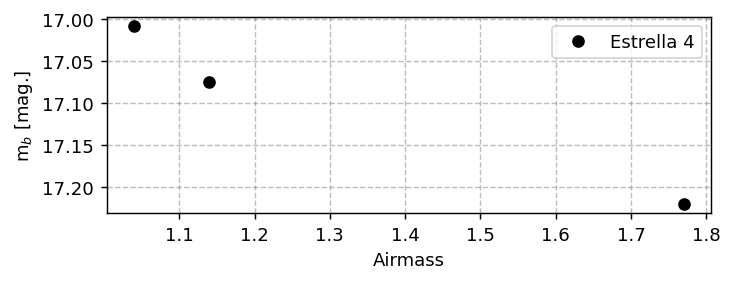

In [40]:
id = 4
#id = 2 
#por ejemplo
filtro = 'b'
# Filtro el pandas de fotometría para quedarme con una sola estrella en un determinado filtro.
ff = fotometria [ (fotometria['id'] == id) & (fotometria['filtro'] == filtro) ]

fig, ax = plt.subplots ( ncols = 1, nrows = 1, figsize = (6, 2), dpi = 130 )

ax.plot ( ff['airmass'], ff['magnitud'], 'ko', label = 'Estrella ' + str(id) )
ax.set_xlabel ( 'Airmass' )
ax.set_ylabel ( 'm$_' + filtro +'$ [mag.]' )

plt.legend()
plt.gca().invert_yaxis()
plt.grid ( color = 'gray', linestyle = '--', alpha = 0.5 )

plt.show()

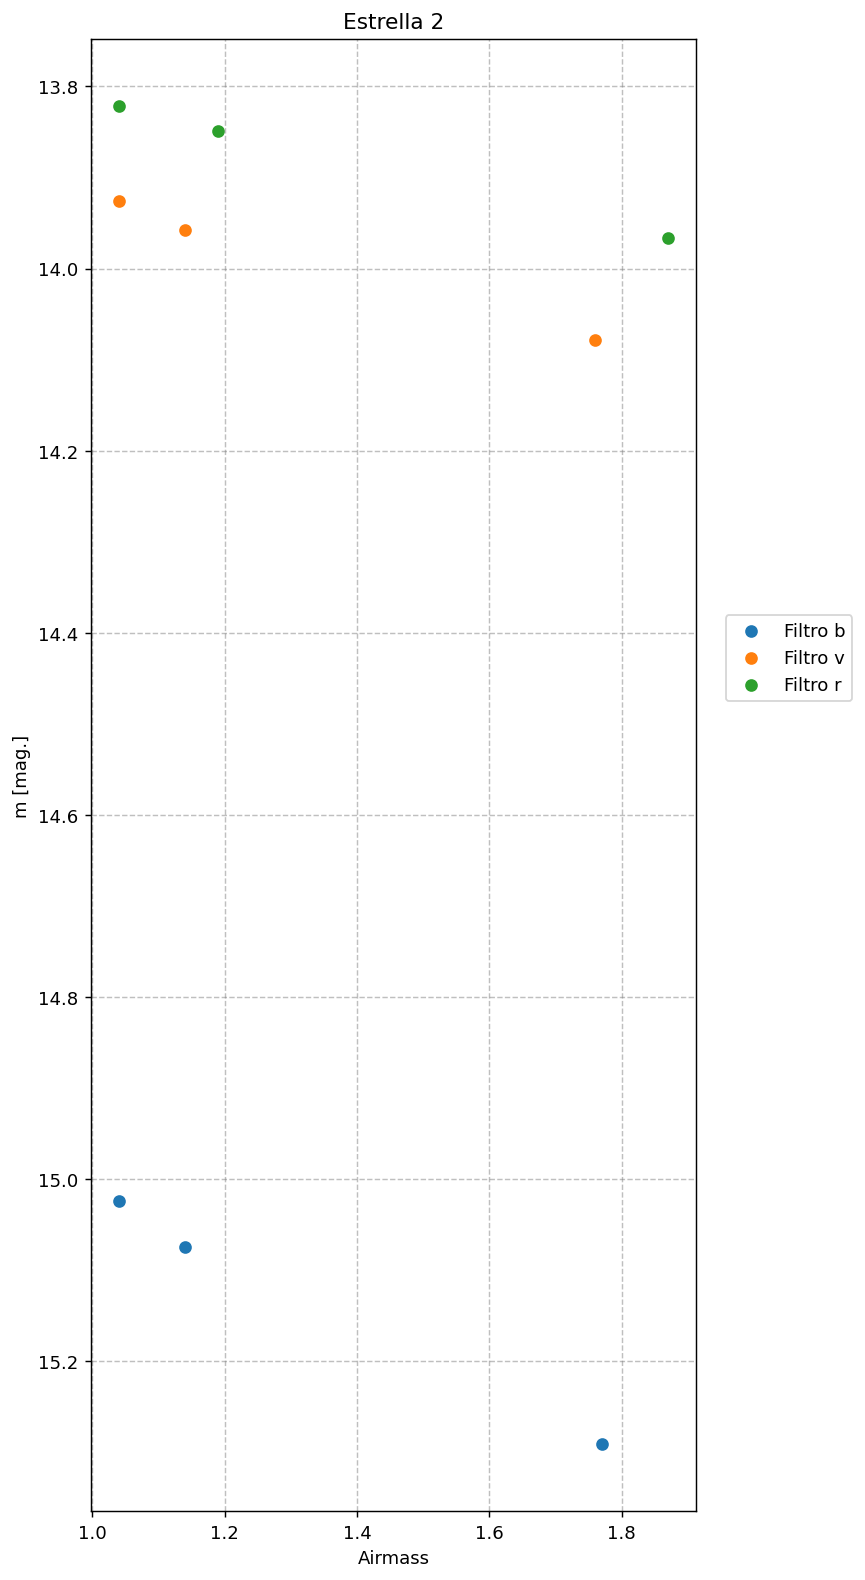

In [41]:
id = 2
filtro = 'b'

fig, ax = plt.subplots ( ncols = 1, nrows = 1, figsize = (6, 15), dpi = 130 )
plt.title ( 'Estrella ' + str(id) )
# figsize = (6, 15) queda mejor
# figsize = (6, 2)


for F in [ 'b', 'v', 'r' ]:
    ff = fotometria.loc [ (fotometria['id'] == id) & (fotometria['filtro'] == F) ]
    ax.scatter ( ff['airmass'], ff['magnitud'], label = 'Filtro ' + F  )

ax.set_xlabel ( 'Airmass' )
ax.set_ylabel ( 'm [mag.]' )

plt.legend ( loc = (1.05,0.55) )
plt.gca().invert_yaxis()
plt.grid ( color = 'gray', linestyle = '--', alpha = 0.5 )

plt.show()

### Ejemplo de ajuste numérico

In [42]:
id = 1
filtro = 'b'

# Filtro el pandas de fotometría para quedarme con una sola estrella en un determinado filtro.
ff = fotometria [ (fotometria['id'] == id) & (fotometria['filtro'] == filtro) ]

In [44]:
r, cov = np.polyfit(ff['airmass'], ff['magnitud'], deg = 1, cov = True )
std = np.sqrt(np.diag(cov))

#polifit para ajustar una recta

pendiente = r[0]
ordenada = r[1]
pendiente_e = std[0]
ordenada_e = std[1]

# Defino un cartel para poner en la figura con los parametros ajustados
label = 'y = (%4.2f$\pm$%4.2f)*x + (%4.2f$\pm$%4.2f)' %(pendiente, pendiente_e, ordenada, ordenada_e)
label

'y = (0.36$\\pm$0.09)*x + (17.40$\\pm$0.13)'

In [45]:
r

array([ 0.36153641, 17.4048525 ])

In [46]:
cov
#matriz de covarianza he'i
#en la diagonal tenemos los errores al cuadrado

array([[ 0.00857413, -0.01128927],
       [-0.01128927,  0.01575954]])

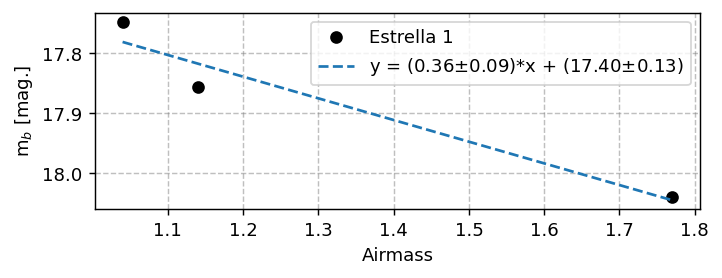

In [48]:
def fitted_line(x):
    return pendiente * x + ordenada

fig, ax = plt.subplots ( ncols = 1, nrows = 1, figsize = (6, 2), dpi = 130 )

ax.plot ( ff['airmass'], ff['magnitud'], 'ko', label = 'Estrella ' + str(id) )
ax.plot ( ff['airmass'], fitted_line(ff['airmass']), '--', label = label )

ax.set_xlabel ( 'Airmass' )
ax.set_ylabel ( 'm$_' + filtro + '$ [mag.]' )

plt.legend()
plt.gca().invert_yaxis()
plt.grid ( color = 'gray', linestyle = '--', alpha = 0.5 )

plt.show()

notar que la estrella 3 está muy al borde y la recta nos va a dar creciente. que este muy al borde nos da problemas con el radio de apertura y y los radios del anillo

la atmosfera es la misma 

m_0 y k


paper de baume.

**Más ejemplos: [Fitting a line:astropy](https://docs.astropy.org/en/stable/modeling/example-fitting-line.html).**